# 2. Linear Discriminant Analysis

## 2.1. Importar bibliotecas estándar
$\sum x_i$

In [23]:
import os
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt

#Clasificador LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

## Ejemplo 1. Iris

In [2]:
data = pd.read_csv( '../../data/iris.csv' )
data.shape

(150, 5)

In [3]:
colors = np.array( ['g']*data.shape[0] )
colors.shape

(150,)

In [4]:
mask = data.type=='Iris-setosa'

In [5]:
colors[ mask ] = 'r'
colors

array(['r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r',
       'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r',
       'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r',
       'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'g', 'g',
       'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g',
       'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g',
       'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g',
       'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g',
       'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g',
       'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g',
       'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g',
       'g', 'g', 'g', 'g', 'g', 'g', 'g'], dtype='|S1')

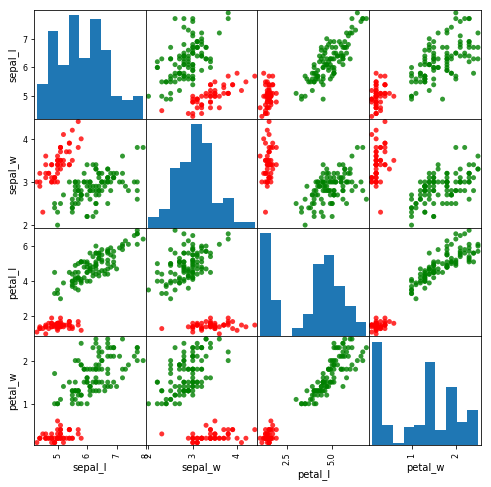

In [6]:
pd.plotting.scatter_matrix(data, figsize=(8, 8),alpha=.8,s=100,color=colors)
plt.show()

In [7]:
data.loc[50:,'type']

50     Iris-versicolor
51     Iris-versicolor
52     Iris-versicolor
53     Iris-versicolor
54     Iris-versicolor
55     Iris-versicolor
56     Iris-versicolor
57     Iris-versicolor
58     Iris-versicolor
59     Iris-versicolor
60     Iris-versicolor
61     Iris-versicolor
62     Iris-versicolor
63     Iris-versicolor
64     Iris-versicolor
65     Iris-versicolor
66     Iris-versicolor
67     Iris-versicolor
68     Iris-versicolor
69     Iris-versicolor
70     Iris-versicolor
71     Iris-versicolor
72     Iris-versicolor
73     Iris-versicolor
74     Iris-versicolor
75     Iris-versicolor
76     Iris-versicolor
77     Iris-versicolor
78     Iris-versicolor
79     Iris-versicolor
            ...       
120     Iris-virginica
121     Iris-virginica
122     Iris-virginica
123     Iris-virginica
124     Iris-virginica
125     Iris-virginica
126     Iris-virginica
127     Iris-virginica
128     Iris-virginica
129     Iris-virginica
130     Iris-virginica
131     Iris-virginica
132     Iri

### Seleccionar rasgos

In [8]:
X = data.loc[:99,['sepal_l','sepal_w','petal_l','petal_w']]
X

,sepal_l,sepal_w,petal_l,petal_w
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [9]:
b = np.ones(X.shape[0])[:,np.newaxis]
b

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [10]:
X = np.concatenate( (X,b ), axis=1 )
X

array([[5.1, 3.5, 1.4, 0.2, 1. ],
       [4.9, 3. , 1.4, 0.2, 1. ],
       [4.7, 3.2, 1.3, 0.2, 1. ],
       [4.6, 3.1, 1.5, 0.2, 1. ],
       [5. , 3.6, 1.4, 0.2, 1. ],
       [5.4, 3.9, 1.7, 0.4, 1. ],
       [4.6, 3.4, 1.4, 0.3, 1. ],
       [5. , 3.4, 1.5, 0.2, 1. ],
       [4.4, 2.9, 1.4, 0.2, 1. ],
       [4.9, 3.1, 1.5, 0.1, 1. ],
       [5.4, 3.7, 1.5, 0.2, 1. ],
       [4.8, 3.4, 1.6, 0.2, 1. ],
       [4.8, 3. , 1.4, 0.1, 1. ],
       [4.3, 3. , 1.1, 0.1, 1. ],
       [5.8, 4. , 1.2, 0.2, 1. ],
       [5.7, 4.4, 1.5, 0.4, 1. ],
       [5.4, 3.9, 1.3, 0.4, 1. ],
       [5.1, 3.5, 1.4, 0.3, 1. ],
       [5.7, 3.8, 1.7, 0.3, 1. ],
       [5.1, 3.8, 1.5, 0.3, 1. ],
       [5.4, 3.4, 1.7, 0.2, 1. ],
       [5.1, 3.7, 1.5, 0.4, 1. ],
       [4.6, 3.6, 1. , 0.2, 1. ],
       [5.1, 3.3, 1.7, 0.5, 1. ],
       [4.8, 3.4, 1.9, 0.2, 1. ],
       [5. , 3. , 1.6, 0.2, 1. ],
       [5. , 3.4, 1.6, 0.4, 1. ],
       [5.2, 3.5, 1.5, 0.2, 1. ],
       [5.2, 3.4, 1.4, 0.2, 1. ],
       [4.7, 3

### Crear etiquetas

In [11]:
L = -2*(data.loc[:99,'type']=='Iris-setosa') + 1
L

0    -1
1    -1
2    -1
3    -1
4    -1
5    -1
6    -1
7    -1
8    -1
9    -1
10   -1
11   -1
12   -1
13   -1
14   -1
15   -1
16   -1
17   -1
18   -1
19   -1
20   -1
21   -1
22   -1
23   -1
24   -1
25   -1
26   -1
27   -1
28   -1
29   -1
     ..
70    1
71    1
72    1
73    1
74    1
75    1
76    1
77    1
78    1
79    1
80    1
81    1
82    1
83    1
84    1
85    1
86    1
87    1
88    1
89    1
90    1
91    1
92    1
93    1
94    1
95    1
96    1
97    1
98    1
99    1
Name: type, Length: 100, dtype: int64

In [24]:
X_Train = X[10:90]
Y_Train = L[10:90]

X_Test = np.concatenate( (X[0:10],X[90:100]) )
Y_Test = np.concatenate( (L[0:10],L[90:100]) )

In [25]:
inv = np.dot( X_Train.T, X_Train )
inv = np.linalg.inv( inv )
W   = np.dot( inv,X_Train.T )
W   = np.dot( W,Y_Train )
W

array([-0.0412745 , -0.30698749,  0.4460364 ,  0.44708763, -0.46423865])

In [26]:
L_es = np.dot( X_Test,W )
L_es = -2*(L_es<0)+1

In [27]:
from sklearn.metrics import confusion_matrix as cmx

In [28]:
cmx( Y_Test,L_es )

array([[10,  0],
       [ 0, 10]])

### Partir conjuntos de entrenamiento y prueba

In [29]:
N   = np.ceil( X.shape[0]*.6 ).astype('int')
N

60

In [30]:
sel = np.arange( X.shape[0] )
sel

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [31]:
# Para evitar sesgo del clasificador es necesario entrenar y probar
# seleccionando aleatoriamente los datos de cada conjunto
np.random.shuffle(sel)
print (N)
print (sel)

60
[66 36 41 17 97 29 26 79 57 35 94 48 86 39 21 91 51 62  6 68  5 70 55 10
 90 98 82 71 74 81 11 18 52 53 96 58 25 37 44 20 19 22 64 78 92 45 89 88
  1 72 32 60 84 59 15 50 38 46 75 13 14 65 76 80  7  9 47 23 24  0 67 33
 12 16 61 43 69 73 40 31 93  4 99 49 77 27 56 34 30 85 83 42 63  3 95 54
  8  2 87 28]


In [32]:
#Mosta
sel[:N]

array([66, 36, 41, 17, 97, 29, 26, 79, 57, 35, 94, 48, 86, 39, 21, 91, 51,
       62,  6, 68,  5, 70, 55, 10, 90, 98, 82, 71, 74, 81, 11, 18, 52, 53,
       96, 58, 25, 37, 44, 20, 19, 22, 64, 78, 92, 45, 89, 88,  1, 72, 32,
       60, 84, 59, 15, 50, 38, 46, 75, 13])

In [21]:
sel[N:]

array([51, 39, 62, 65, 38, 17, 60, 22, 28, 71, 76, 18, 56, 47, 59, 79, 94,
       44, 52, 89, 95, 31, 10, 88, 23, 86,  8, 26, 32, 27, 96, 90, 34, 67,
       87, 21, 15, 74, 77, 20])

### Entrenar

In [22]:
model = LDA()
model.fit(X.loc[ sel[:N] ], L[ sel[:N] ])

NameError: name 'LDA' is not defined

### Evaluar en un conjunto de datos no vistos

In [ ]:
L_predict = model.predict( X.loc[ sel[N:] ] )

In [ ]:
for n,(i,j) in enumerate( zip( L[ sel[N:] ],L_predict )  ):
    if i!=j:
        print( '%d,\t%d,\t%d'%(n,i,j) )


In [ ]:
from sklearn.metrics import classification_report as report

classes = ['Iris Setosa','Otras']
print ( report( L[ sel[N:] ],L_predict,target_names=classes ) )

### Parametros adicionales

In [ ]:
#imprimir todos los métodos y atributos de un objeto
print (dir(model))

In [ ]:
print ( model.coef_ )

In [ ]:
print ( model.intercept_ )

## Hasta aquí revisamos en la segunda sesión

## Ejemplo 2. Problema de tres clases

In [ ]:
X = data.loc[:,['sepal_l','sepal_w','petal_l','petal_w']]
X

In [ ]:
N   = np.ceil( .6*X.shape[0]/3. ).astype('int')
sel = np.arange( X.shape[0]/3 )
np.random.shuffle(sel)

print (N)
print (sel)

In [ ]:
#X      = X.values
X      = X.reshape( 3,50,4 )
XTrain = X[ :,sel[:N] ] 
XTest  = X[ :,sel[N:] ] 

In [ ]:
Y = np.array( [1,2,3]*50 ).reshape(50,3)
print (Y)

In [ ]:
YTrain = Y[ sel[:N] ].flatten()
YTest  = Y[ sel[N:] ].flatten()

In [ ]:
model = LDA()
model.fit(XTrain, YTrain)

## Ejemplo 3. Monitorea de actividad

## 2.2. Cargar archivo [Human Activity Recognition with Smartphones (Simplified)](https://www.kaggle.com/mboaglio/simplifiedhuarus)

In [ ]:
data = pd.read_csv( '../../data/wearable-train.csv' )

## 2.3. Despliegue de los datos

In [ ]:
data

## Análisis

In [ ]:
data.describe()

### Seleccionando aceleración media del cuerpo en los tres ejes

In [ ]:
fts = ['tBodyAcc.mean.X','tBodyAcc.mean.Y','tBodyAcc.mean.Z'] 
data[ data.activity=='LAYING' ].loc[:, fts ]

## Clasificar entre caminar y estar acostado

### Construir la base de datos de entrenamiento

In [ ]:
fts  = ['tBodyAcc.mean.X','tBodyAcc.mean.Y','tBodyAcc.mean.Z']
X_C1 = data[ data.activity=='LAYING' ].loc[:, fts ]
L_C1 = -np.ones( X_C1.shape[0] )

In [ ]:
X_C2 = data[ data.activity=='WALKING' ].loc[:, fts ]
L_C2 = np.ones( X_C2.shape[0] )

print (X_C1.shape)
print (X_C2.shape)

In [ ]:
X_Train = np.concatenate( (X_C1,X_C2),axis=0 )

print (X_Train.shape)
print (L_C1.shape)
print (L_C2.shape)

In [ ]:
L_Train = np.concatenate( (L_C1,L_C2) )
print (L_Train)

In [ ]:
colors = np.array( ['r']*L_Train.shape[0] )
colors[L_Train==-1] = 'b'
print (colors)

In [ ]:
pd.plotting.scatter_matrix( pd.DataFrame(X_Train), figsize=(6, 6),alpha=.8,s=100,color=colors)
plt.show()

### La media resulto ser un mal rasgo

In [ ]:
fts  = ['tBodyAcc.std.X','tBodyAcc.std.Y','tBodyAcc.std.Z']
X_C1 = data[ data.activity=='LAYING' ].loc[:, fts ]
L_C1 = -np.ones( X_C1.shape[0] )
X_C2 = data[ data.activity=='WALKING' ].loc[:, fts ]
L_C2 = np.ones( X_C2.shape[0] )

X_Train = np.concatenate( (X_C1,X_C2),axis=0 )
L_Train = np.concatenate( (L_C1,L_C2) )

colors = np.array( ['r']*L_Train.shape[0] )
colors[L_Train==-1] = 'b'

pd.plotting.scatter_matrix( pd.DataFrame(X_Train), figsize=(6, 6),alpha=.8,s=100,color=colors)
plt.show()

## Entrenar al clasificador

### Partición de datos

In [ ]:
N   = np.ceil( X_Train.shape[0]*.7 ).astype('int')
sel = np.arange( X_Train.shape[0] )
np.random.shuffle(sel)

print (N)
print (sel)

### Crear objeto LDA para entrenar con datos X_Train, L_Train -> (Clasificador supervisado)

In [ ]:
model = LDA()
model.fit(X_Train[ sel[:N] ], L_Train[ sel[:N] ])

### Clasificar con el método

In [ ]:
L_predict = model.predict( X_Train[ sel[N:] ] )

In [ ]:
for n,(i,j) in enumerate( zip( L_Train[ sel[N:] ],L_predict )  ):
    if i!=j:
        print ('%d,\t%d,\t%d'%(n,i,j))

### Evaluación de desempeño

In [ ]:
from sklearn.metrics import classification_report as report

classes = ['Laying','Walking']
print ( report( L_Train[ sel[N:] ],L_predict,target_names=classes ) )

## Clasificación entre caminando y de pie

In [ ]:
fts  = ['tBodyAcc.entropy.X','tBodyAcc.entropy.Y','tBodyAcc.entropy.Z','tBodyAcc.std.Z','tBodyAcc.std.Y']
#fts  = ['tBodyAcc.mean.X','tBodyAcc.mean.Y','tBodyAcc.std.Z']
X_C1 = data[ data.activity=='STANDING' ].loc[:, fts ]
L_C1 = -np.ones( X_C1.shape[0] )
X_C2 = data[ data.activity=='WALKING' ].loc[:, fts ]
L_C2 = np.ones( X_C2.shape[0] )

X_Train = np.concatenate( (X_C1,X_C2),axis=0 )
L_Train = np.concatenate( (L_C1,L_C2) )

colors = np.array( ['r']*L_Train.shape[0] )
colors[L_Train==-1] = 'b'

pd.plotting.scatter_matrix( pd.DataFrame(X_Train), figsize=(6, 6),alpha=.8,s=100,color=colors)
plt.show()

In [ ]:
N   = np.ceil( X_Train.shape[0]*.7 ).astype('int')
sel = np.arange( X_Train.shape[0] )
np.random.shuffle(sel)

print N, sel

model = LDA()
model.fit(X_Train[ sel[:N] ], L_Train[ sel[:N] ])

In [ ]:
L_predict = model.predict( X_Train[ sel[N:] ] )

In [ ]:
for n,(i,j) in enumerate( zip( L_Train[ sel[N:] ],L_predict )  ):
    if i!=j:
        print ('%d,\t%d,\t%d'%(n,i,j))

In [ ]:
from sklearn.metrics import classification_report as report

classes = ['Laying','Walking']
print ( report( L_Train[ sel[N:] ],L_predict,target_names=classes ) )

In [ ]:
L_predict = model.predict( X.loc[ sel[N:] ] )

#### ejercicio: fts  = ['']


In [ ]:
for i in data.columns:
    print (i)